<a href="https://colab.research.google.com/github/BalkeesRekik/DS1002/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

In [4]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [7]:
series = pd.Series(list)
print(series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [15]:
index = range(2, 17 , 3)
series.index = index

print (series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


**I found 17 by multiplying the length of the series by the steps and adding 2 since that is the starting point.**

4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [16]:
data = { "Names" : ["Maryam", "Asma", "Rahma", "Fatma"],
        "Ages" : [35, 33, 31, 30],
         "Careers" :["Architect", "Teacher", "Dietitian", "Researcher"]}

df = pd.DataFrame(data)

print(df)


    Names  Ages     Careers
0  Maryam    35   Architect
1    Asma    33     Teacher
2   Rahma    31   Dietitian
3   Fatma    30  Researcher


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [21]:
df.index.name = "participant_id"
print(df)

                 Names  Ages     Careers
participant_id                          
0               Maryam    35   Architect
1                 Asma    33     Teacher
2                Rahma    31   Dietitian
3                Fatma    30  Researcher


6. Use a pandas function to determine the data types of the columns of `df`.

In [23]:
data_types = df.dtypes
print(data_types)

Names      object
Ages        int64
Careers    object
dtype: object


7. Using bracket notation, reference column `name`

In [25]:
reference = df["Names"]
print(reference)

participant_id
0    Maryam
1      Asma
2     Rahma
3     Fatma
Name: Names, dtype: object


8. Using dot notation, reference column `name`

In [26]:
reference.dot = df.Names
print(reference.dot)

participant_id
0    Maryam
1      Asma
2     Rahma
3     Fatma
Name: Names, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [29]:
names_df = df[["Names"]]
print(names_df)


                 Names
participant_id        
0               Maryam
1                 Asma
2                Rahma
3                Fatma


9. Show the 3rd element in column `career`.

In [31]:
third_career = df.loc[2, "Careers"]
print(third_career)

Dietitian


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [4]:
iris = sns.load_dataset('iris')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [5]:
correlation = iris[["sepal_length", "sepal_width"]].corr()
print(correlation)

              sepal_length  sepal_width
sepal_length       1.00000     -0.11757
sepal_width       -0.11757      1.00000


**The correlation is -0.11757 but it was printed out as a matrix istead of just the value.**

12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [7]:
setosa_corr = iris[iris["species"] == "setosa"][["sepal_length", "sepal_width"]].corr().iloc[0,1]
versicolor_corr = iris[iris["species"]== "versicolor"][["sepal_length", "sepal_width"]].corr().iloc[0,1]
virginica_corr = iris[iris["species"]== "virginica"][["sepal_length", "sepal_width"]].corr().iloc[0,1]

max_corr_species, max_corr_value = max(("setosa",setosa_corr), ("versicolor", versicolor_corr) , ("virginica", virginica_corr))

print("Species with the highest correlation: ", max_corr_species)
print("Correlation: ", max_corr_value)

Species with the highest correlation:  virginica
Correlation:  0.45722781639411325


**I found the correlation coefficient for each species independently and then compared them and found the maximum value**

13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [8]:
overall_correlation = iris.corr(numeric_only=True) # The code did not work initally until I changed it to numeric only
min_overall_correlation = overall_correlation.min().nsmallest(2)

print("The most negatively correlated variables: ", min_overall_correlation)

species_min_correlation = {}

for species in iris["species"]:
  species_correlation = iris[iris["species"] == species].corr(numeric_only=True)
  species_min_correlation[species] = species_correlation.min().nsmallest(2)

print("The most negatively correlated variables for each species: ", species_min_correlation)


The most negatively correlated variables:  sepal_width    -0.42844
petal_length   -0.42844
dtype: float64
The most negatively correlated variables for each species:  {'setosa': sepal_width     0.1777
petal_length    0.1777
dtype: float64, 'versicolor': sepal_length    0.525911
sepal_width     0.525911
dtype: float64, 'virginica': sepal_length    0.281108
petal_width     0.281108
dtype: float64}


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


**This phenomenon could be due to variations among different species in the dataset. When considering all species together, the correlation between sepal width and petal length might seem negative. However, upon analyzing each species seperatley, it's possible to observe a positive relationship between these variable within each species. The reason behind this could be the disticntive traits and charateristics of each species. For instance, some species might naturally possess wider sepals and longer petals, therefore resulting in a positive correlation withing that specofoc species.**

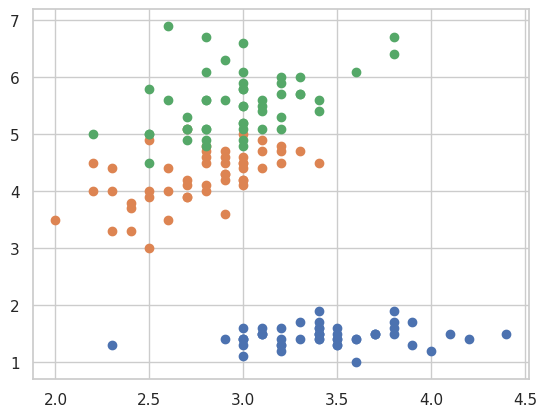

In [94]:
for species in iris["species"].unique():
  species_data = iris[iris["species"] == species]
  plt.scatter(species_data["sepal_width"], species_data["petal_length"], label = species)

plt.show()

Citations:

[reference](https://https://stackoverflow.com/questions/33417991/pandas-why-are-double-brackets-needed-to-select-column-after-boolean-indexing#:~:text=For%20df%5B%5Bcolname(s,double%20brackets%20return%20a%20dataframe.)

[nsmallest](https://https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nsmallest.html)

[.unique](https://https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

